In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris

%matplotlib inline

In [2]:
iris = load_iris()

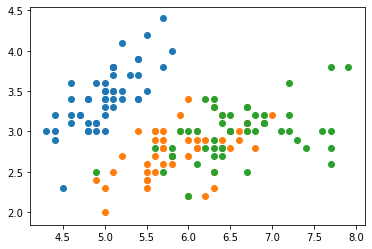

In [4]:
#target
plt.scatter(iris.data[:50,0], iris.data[:50,1])
plt.scatter(iris.data[50:100,0], iris.data[50:100,1])
plt.scatter(iris.data[100:150,0], iris.data[100:150,1])
plt.show()

In [15]:
from sklearn.cluster import KMeans

est = KMeans(n_clusters=3)
est.fit(iris.data)
label_pred = est.labels_

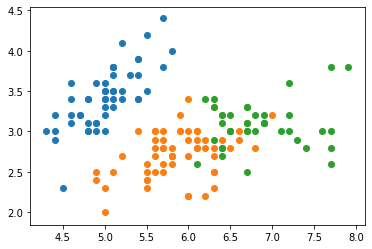

In [18]:
plt.scatter(iris.data[label_pred == 0][:,0], iris.data[label_pred == 0][:,1])
plt.scatter(iris.data[label_pred == 1][:,0], iris.data[label_pred == 1][:,1])
plt.scatter(iris.data[label_pred == 2][:,0], iris.data[label_pred == 2][:,1])
plt.show()

In [98]:
#try to classify label = 1 & label = 2
data = iris.data
tg = iris.target

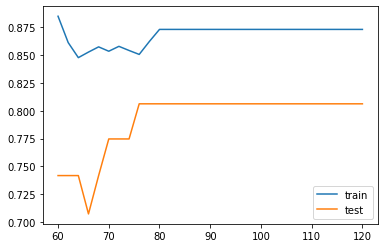

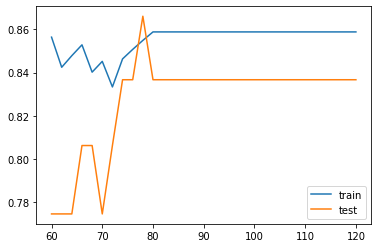

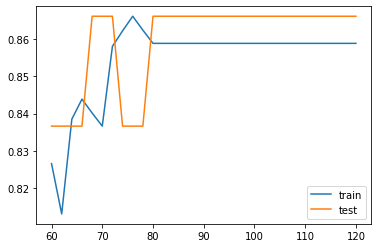

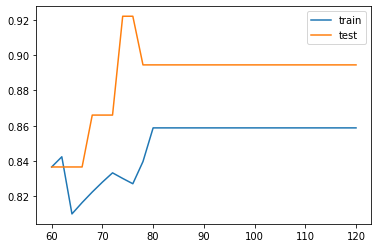

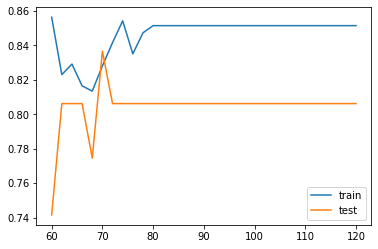

In [173]:
# try to draw learning curve with LogisticRegression but it seems useless

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

K = 5

sc = StandardScaler()
lr = LogisticRegression(C=100, random_state=1)

X = data[:,:2]
y = tg

sFolder = StratifiedKFold(n_splits=K, random_state=0, shuffle=True).split(X,y)

for k, (train,test)in enumerate(sFolder):
    learn_score = []
    test_score = []
    sc.fit(X[train])
    X_train_std = sc.transform(X[train])
    X_test_std = sc.transform(X[test])
    for i in range(60, 121, 2):
        lr = LogisticRegression(C=100, random_state=1)
        lr.fit(X_train_std[:i], y[train][:i])
        
        learn_score.append(lr.score(X_train_std[:i], y[train][:i]))
        test_score.append(lr.score(X_test_std, y[test]))
        
    
    plt.plot([i for i in range(60, 121, 2)], np.sqrt(learn_score), label='train')
    plt.plot([i for i in range(60, 121, 2)], np.sqrt(test_score), label='test')
                    
    plt.legend()
    plt.show()

In [50]:
#try to use SVM

from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

K = 6

sc = StandardScaler()
sFolder = StratifiedKFold(n_splits=K, random_state=0, shuffle=True).split(X,y)

X = iris.data[:,:2]
y = iris.target

for k, (train,test)in enumerate(sFolder):
    sc.fit(X[train])
    X_train_std = sc.transform(X[train])
    X_test_std = sc.transform(X[test])
    clf = svm.SVC(C=0.8, kernel='rbf', gamma=1, decision_function_shape='ovr')
    clf.fit(X_train_std, y[train])
    print(clf.score(X_test_std, y[test]))

0.8
0.72
0.76
0.72
0.84
0.84


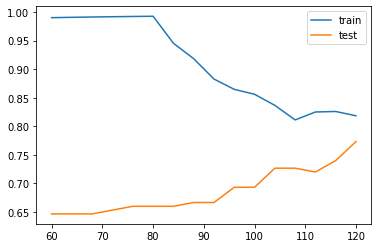

In [42]:
#learning curve

from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

K = 5

sc = StandardScaler()
sFolder = StratifiedKFold(n_splits=K, shuffle=True).split(X,y)

X = iris.data[:,:2]
y = iris.target

it = 0
learn_score = [[] for i in range(K)]
test_score = [[] for i in range(K)]


for k, (train,test)in enumerate(sFolder):
    sc.fit(X[train])
    X_train_std = sc.transform(X[train])
    X_test_std = sc.transform(X[test])
    for i in range(60, 121, 4):
        clf = svm.SVC(C=0.8, kernel='rbf', gamma=1, decision_function_shape='ovr')
        clf.fit(X_train_std[:i], y[train][:i])
        
        learn_score[it].append(clf.score(X_train_std[:i], y[train][:i]))
        test_score[it].append(clf.score(X_test_std, y[test]))
    it+=1
    
learn = np.array([0 for i in range(len(learn_score[0]))])
test = np.array([[0 for i in range(len(learn_score[0]))]])
for i in range(K):
    ls = np.array(learn_score[i])
    ts = np.array(test_score[i])
    learn = learn+ls
    test = test+ts
    
learn_score = learn/K
test_score = test/K
        
    
plt.plot([i for i in range(60, 121, 4)], learn_score, label='train')
plt.plot([i for i in range(60, 121, 4)], test_score[0], label='test')
                    
plt.legend()
plt.show()

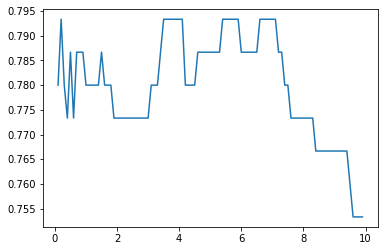

In [66]:
#In this case, the number of data does less than gamma
#validation curve

from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

K = 6

sc = StandardScaler()

X = iris.data[:,:2]
y = iris.target

it = 0
val_gamma = [i/10 for i in range(1, 100)] #gamma from 0.1 to 10.0
avg_score = [0 for i in val_gamma]

for val in val_gamma:
    sFolder = StratifiedKFold(n_splits=K, random_state=0, shuffle=True).split(X,y)
    for k, (train,test)in enumerate(sFolder):
        sc.fit(X[train])
        X_train_std = sc.transform(X[train])
        X_test_std = sc.transform(X[test])
        clf = svm.SVC(C=0.8, kernel='rbf', gamma=val, decision_function_shape='ovr')
        clf.fit(X_train_std, y[train])
        clf.fit(X_train_std, y[train])
        avg_score[it] += clf.score(X_test_std, y[test])
    avg_score[it]/=K
    it+=1
    
plt.plot(val_gamma, avg_score)
plt.show()

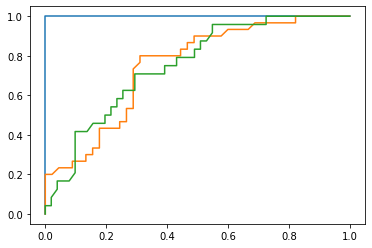

In [89]:
#ROC curve
from sklearn import svm
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split

sc = StandardScaler()
sFolder = StratifiedKFold(n_splits=K, random_state=0, shuffle=True).split(X,y)

X = iris.data[:,:2]
y = iris.target

y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,random_state=0)
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
clf = OneVsRestClassifier(svm.SVC(C=0.8, kernel='rbf', gamma=1, decision_function_shape='ovr'))
scores = clf.fit(X_train_std, y_train).decision_function(X_test_std)
    
fpr = tpr = []
    
for i in range(n_classes):
    fpr_t, tpr_t, _ = roc_curve(y_test[:, i], scores[:, i])
    plt.plot(fpr_t, tpr_t)

In [128]:
# some trails using LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve

K = 6

sc = StandardScaler()
lr = LogisticRegression(C=1, random_state=1, warm_start=False)

X = data[:,:2]
y = tg

ROC_x = [0, 1]
ROC_y = [0, 1]

sFolder = StratifiedKFold(n_splits=K, random_state=0, shuffle=True).split(X,y)

for k, (train,test)in enumerate(sFolder):
    sc.fit(X[train])
    X_train_std = sc.transform(X[train])
    X_test_std = sc.transform(X[test])
    lr.fit(X_train_std, y[train])
    rs_tmp = lr.predict(X_test_std)
    tp = fp = tn = fn = 0
    for i in range(len(rs_tmp)):
        observe = rs_tmp[i]
        espect = y[test][i]
        if observe == espect == 1: tp+=1
        elif observe == espect == 2: tn+=1
        elif observe > espect: fp+=1
        else: fn+=1
    ROC_x.append(tp/(tp+fn))
    ROC_y.append(fp/(fp+tn))
    print(lr.score(X_test_std, y[test]))



0.7058823529411765
0.6470588235294118
0.7647058823529411
0.8235294117647058
0.8125
0.625
